In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


#### Load the training data and the test data using Pandas

In [2]:
train = pd.read_csv('../input/titanic/train.csv')
test = pd.read_csv('../input/titanic/test.csv')

### **What the Data Means**

* **PassengerId:**
* **Survived:** 0 = No, 1 = Yes
* **Pclass;** Ticket Class: 1 = 1st, 2 = 2nd, 3 = 3rd
* **Name:** Name of Passenger
* **Sex:** Male or Female
* **Age:** Age of Passenger
* **SibSp:** Number of Spouses/Siblings on board the Ship
* **Patch:** Number of Parents/Children on the Ship
* **Ticket:** Ticket Number
* **Cabin:** Cabin Number
* **Embarked;** Where the ship was boarded: C = Cherbourg, Q = Queenstown, S = Southampton

#### **Total ROWS** = 891
#### **Total Columns** = 12


In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.shape

(891, 12)

In [6]:
test.shape

(418, 11)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Above, there are ***177 rows*** with missing values for **Age**, there are ***687 rows*** with missing values for **Cabin** and ***2 rows*** with missing values for **Embarked**.

In [10]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Above, there are ***86 rows*** with missing values for **Age**, there are ***1 row*** with missing value for **Fare** and ***327 rows*** with missing values for **Cabin**.

## Visualization

The sns is a call of Seaborn that has been imported above. It has been set to default for plots

In [11]:
sns.set()

### Bar chart for Categorical Features
* Pclass
* Sex
* SibSp
* Parch
* Embarked
* Cabin

In [12]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    died = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived, died])
    df.index = ['Survived','Dead']
    df.plot(kind='bar', stacked=False, figsize=(10,5))

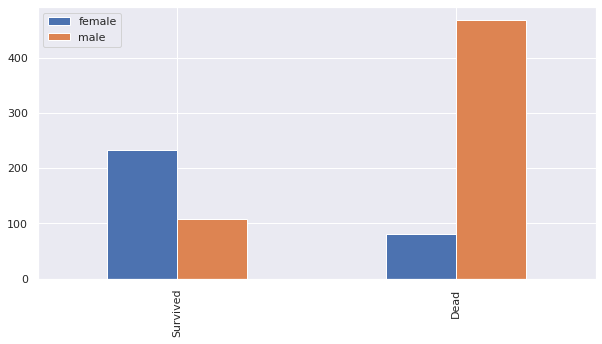

In [13]:
bar_chart('Sex')

* From the bar chart, it is shown that Female survived more than the male

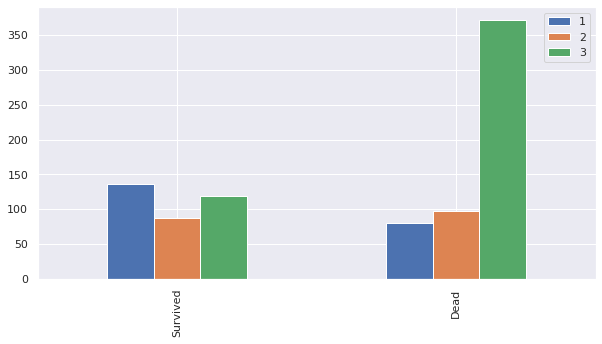

In [14]:
bar_chart('Pclass')

* From the chart above, The 1st class survived more than the 2nd and 3rd class
* while the 3rd class died more than other classes even when it showed that they survived more than the 2nd class.

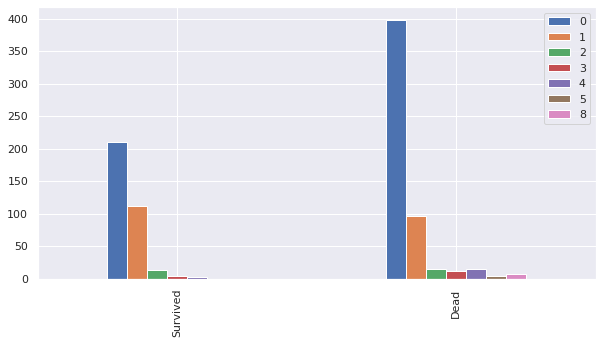

In [15]:
bar_chart('SibSp')

* This shows that a person that boards with more than 2 siblings or spouse will more likely survive

* A person that boards alone will more likely die.

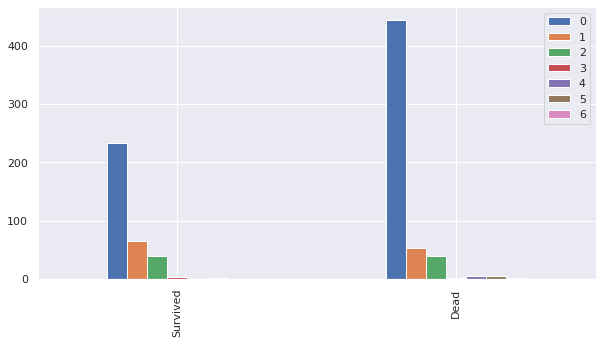

In [16]:
bar_chart('Parch')

* This shows that a person that boards with more than 2 prents or children will more likely survive

* A person that boards alone will more likely die.

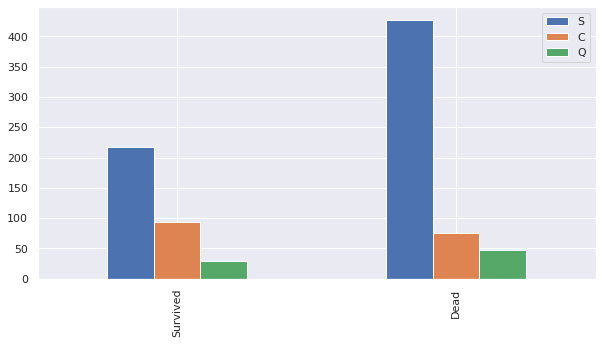

In [17]:
bar_chart('Embarked')

* This shows that a person that boards from Cherboug (C)

* A person that boards from Queenstown (Q) or Southampton (S) will more likely die.

## Training Data

### 1. Title

In [18]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [19]:
train_test_data = [train, test]

for data in train_test_data:
    data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [20]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dr          1
Dona        1
Ms          1
Name: Title, dtype: int64

In [21]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Mme           1
Sir           1
Countess      1
Capt          1
Ms            1
Lady          1
Jonkheer      1
Don           1
Name: Title, dtype: int64

Change title mapping to 4 identities:
* Mr = 0
* Miss = 1
* Mrs = 2
* Others = 3

In [22]:
title_mapping = {'Mr':0, 'Miss':1, 'Mrs':2, 'Master':3, 'Dr':3, 'Col':3, 'Rev':3, 'Ms':3, 'Dona':3, 'Major':3, 'Mlle':3, 'Countess':3, 'Lady':3, 'Jonkheer':3, 'Don':3, 'Mme':3, 'Capt':3, 'Sir':3}

for data in train_test_data:
    data['Title'] = data['Title'].map(title_mapping)


In [23]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [24]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


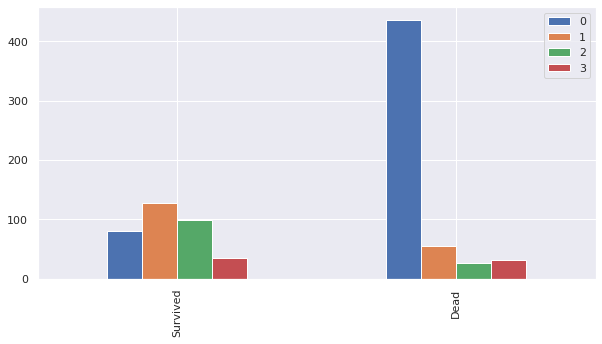

In [25]:
bar_chart('Title')

### Drop Name

In [26]:
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [27]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [28]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2


### 2. Sex

In [29]:
sex_mapping = {'male':0, 'female':1}
for data in train_test_data:
    data['Sex'] = data['Sex'].map(sex_mapping)

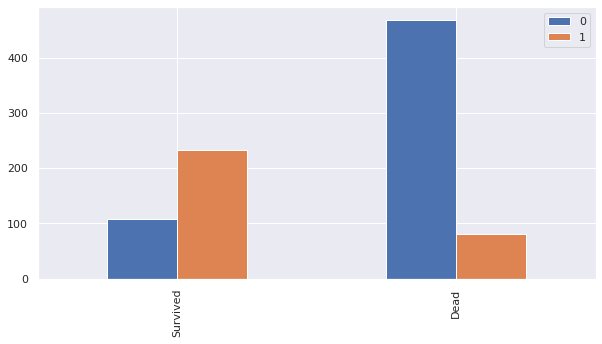

In [30]:
bar_chart('Sex')

### 3. Age

* input missing value and analyze

In [31]:
train['Age'].fillna(train.groupby('Title')['Age'].transform('median'), inplace=True)
test['Age'].fillna(test.groupby('Title')['Age'].transform('median'), inplace=True)

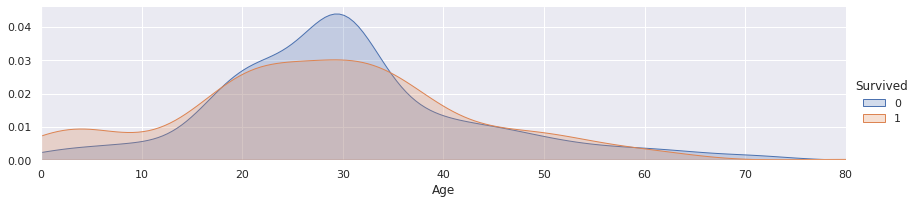

In [32]:
facet = sns.FacetGrid(train, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()

plt.show()

(0.0, 20.0)

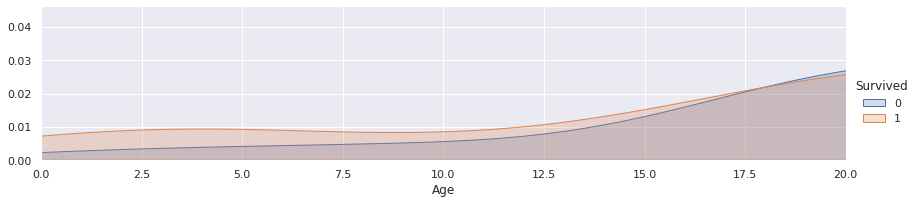

In [33]:
facet = sns.FacetGrid(train, hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()

plt.xlim(0, 20)

(20.0, 30.0)

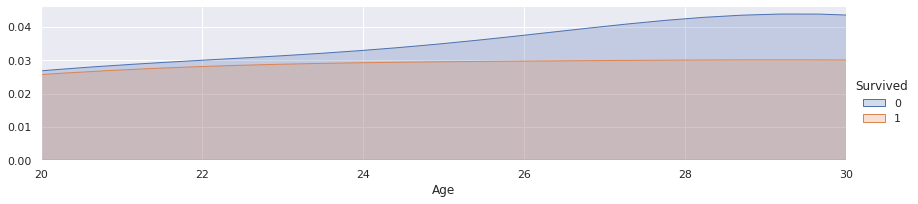

In [34]:
facet = sns.FacetGrid(train, hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()

plt.xlim(20, 30)

(30.0, 40.0)

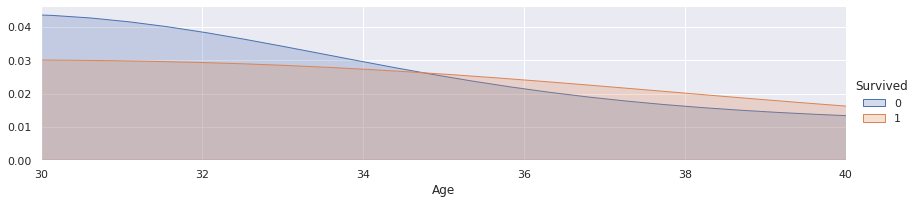

In [35]:
facet = sns.FacetGrid(train, hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()

plt.xlim(30, 40)

(40.0, 50.0)

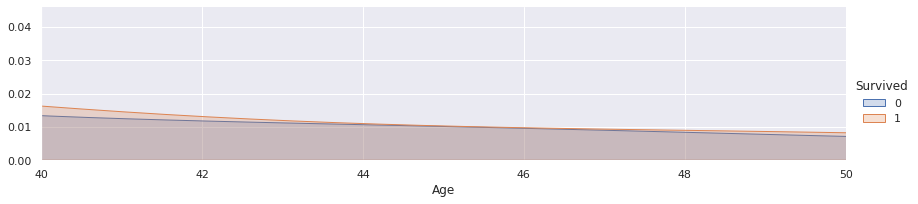

In [36]:
facet = sns.FacetGrid(train, hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()

plt.xlim(40, 50)

(50.0, 60.0)

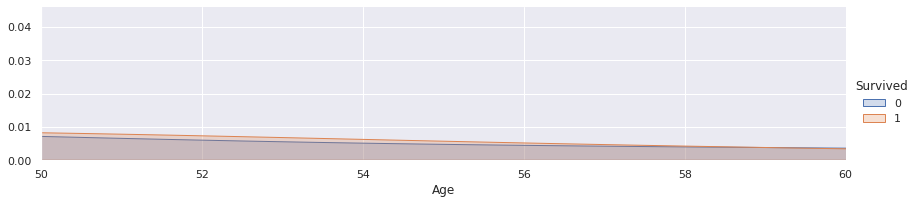

In [37]:
facet = sns.FacetGrid(train, hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()

plt.xlim(50, 60)

(60.0, 70.0)

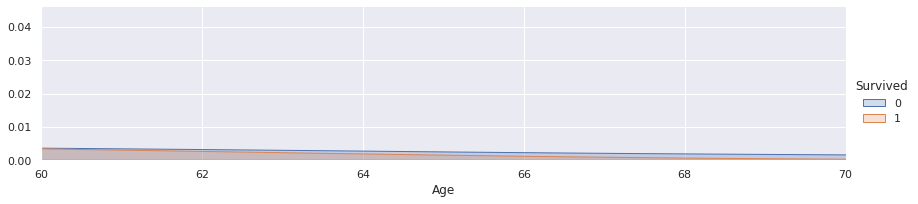

In [38]:
facet = sns.FacetGrid(train, hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()

plt.xlim(60, 70)

(70.0, 80.0)

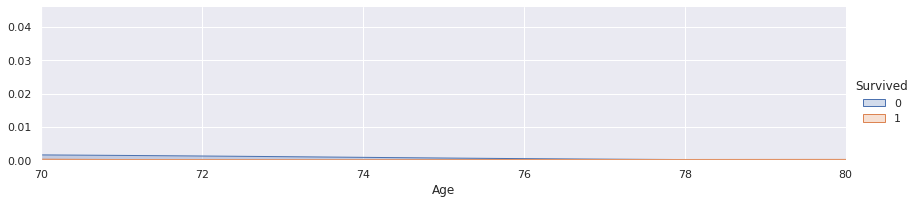

In [39]:
facet = sns.FacetGrid(train, hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()

plt.xlim(70, 80)

In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Title        891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


In [41]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         417 non-null    float64
 8   Cabin        91 non-null     object 
 9   Embarked     418 non-null    object 
 10  Title        418 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 36.0+ KB


## Convert Numerical Age to Categorical Age

* child within (0-15) = 0
* teenager/youth within (16-25) = 1
* adult within (26-35) = 2
* mid-age within (36-61) = 3
* old (62 and above) = 4

In [42]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


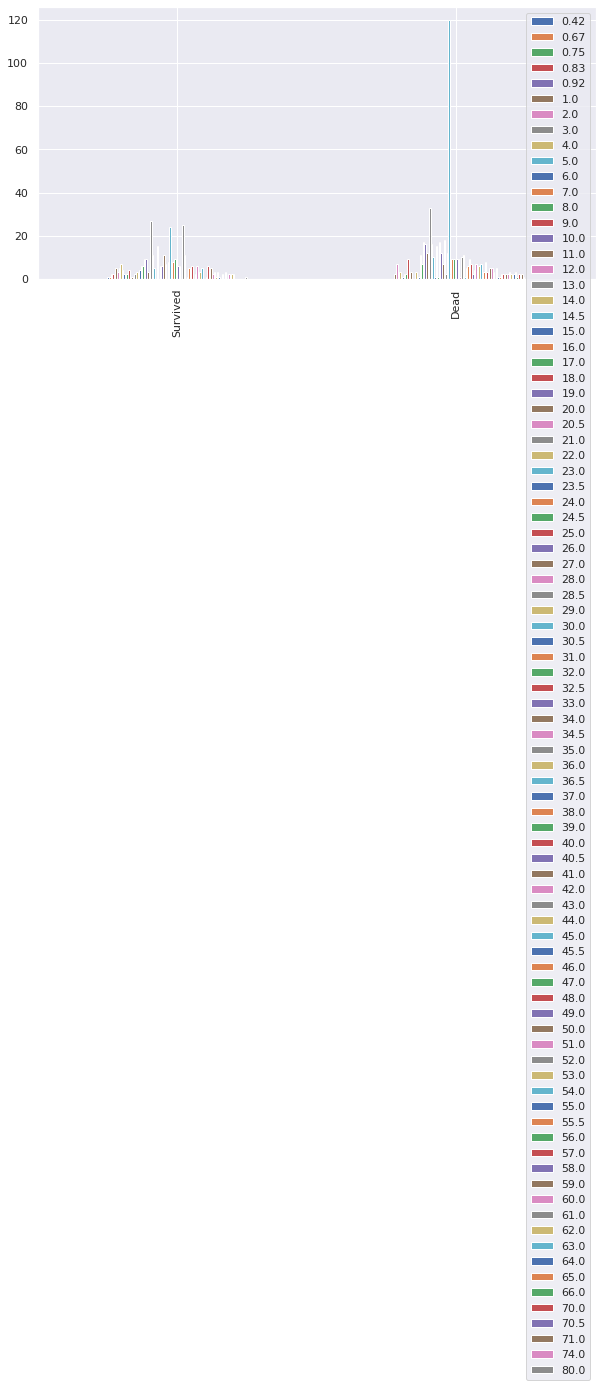

In [43]:
bar_chart('Age')

### 4. Embarked

<AxesSubplot:>

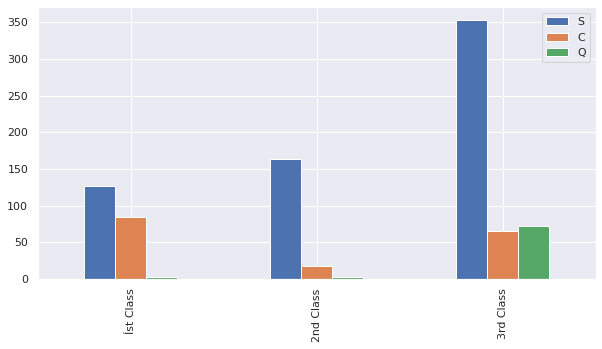

In [44]:
# S = Southampton, C = Cherbourg, Q = Queenstown
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['Íst Class', '2nd Class', '3rd Class']
df.plot(kind='bar', stacked=False, figsize=(10,5))

* more than 50% of all the classes (1st, 2nd and 3rd) are from Southampton(S)

* given the fact that more passengers boarded from S, we will fill out the missing values in Embark with value S

In [45]:
for data in train_test_data:
    data['Embarked'] = data['Embarked'].fillna('S')

In [46]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


In [47]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,1,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,0,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,0,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,1,22.0,1,1,3101298,12.2875,NaN,S,2


In [48]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     891 non-null    object 
 11  Title        891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


In [49]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         417 non-null    float64
 8   Cabin        91 non-null     object 
 9   Embarked     418 non-null    object 
 10  Title        418 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 36.0+ KB


In [50]:
embarked_mapping = {'S':0, 'C':1, 'Q':2}
for data in train_test_data:
    data['Embarked'] = data['Embarked'].map(embarked_mapping)

### 5. Fare

* Fill the missing value for Fare with the median fare for each Pclass.

In [51]:
train['Fare'].fillna(train.groupby('Pclass')['Fare'].transform('median'), inplace=True)
test['Fare'].fillna(test.groupby('Pclass')['Fare'].transform('median'), inplace=True)

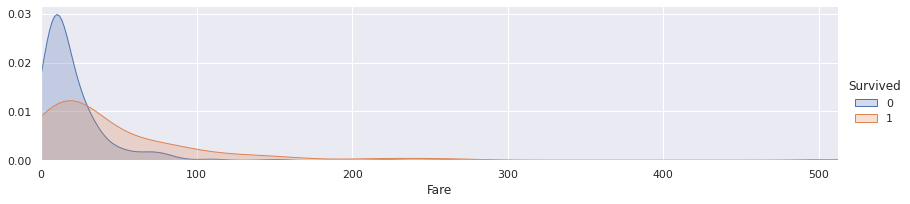

In [52]:
facet = sns.FacetGrid(train, hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Fare',shade=True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()

plt.show()

(0.0, 20.0)

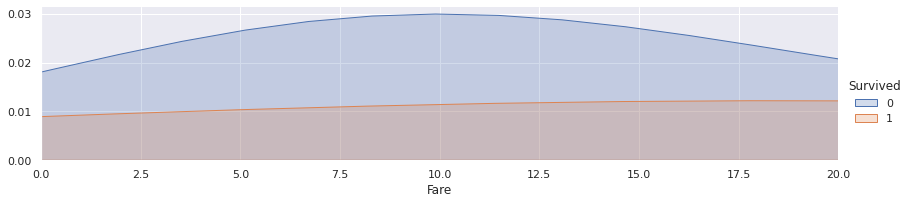

In [53]:
facet = sns.FacetGrid(train, hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Fare',shade=True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()

plt.xlim(0,  20)

(0.0, 30.0)

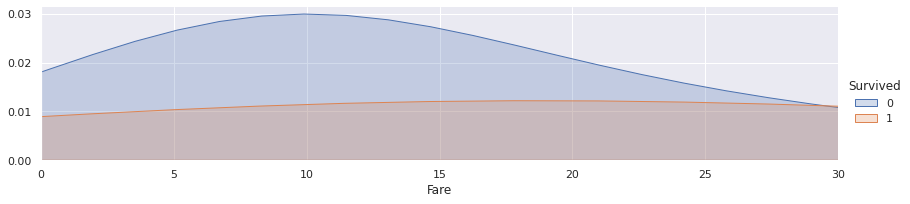

In [54]:
facet = sns.FacetGrid(train, hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Fare',shade=True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()

plt.xlim(0, 30)

(0.0, 512.3292)

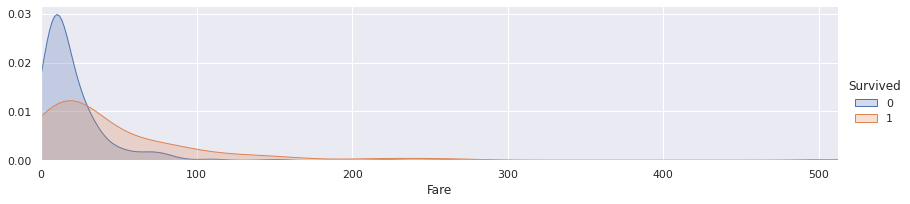

In [55]:
facet = sns.FacetGrid(train, hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Fare',shade=True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()

plt.xlim(0)

In [56]:
for data in train_test_data:
    data.loc[data['Fare'] <= 17, 'Fare'] = 0
    data.loc[(data['Fare'] > 17) & (data['Fare'] <= 30), 'Fare'] = 1
    data.loc[(data['Fare'] > 30) & (data['Fare'] <= 100), 'Fare'] = 2
    data.loc[data['Fare'] > 100, 'Fare'] = 3

In [57]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,38.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,35.0,1,0,113803,2.0,C123,0,2
4,5,0,3,0,35.0,0,0,373450,0.0,NaN,0,0


### 6. Cabin

In [58]:
train.Cabin.value_counts()

G6             4
C23 C25 C27    4
B96 B98        4
E101           3
F2             3
              ..
C99            1
D7             1
D9             1
C111           1
D50            1
Name: Cabin, Length: 147, dtype: int64

In [59]:
for data in train_test_data:
    data['Cabin'] = data['Cabin'].str[:1]

<AxesSubplot:>

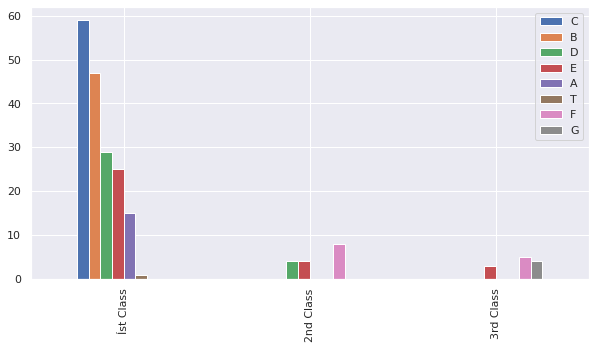

In [60]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['Íst Class', '2nd Class', '3rd Class']
df.plot(kind='bar', stacked=False, figsize=(10,5))

In [61]:
cabin_mapping = {'A':0, 'B': 0.4, 'C': 0.8, 'D': 1.2, 'E': 1.6, 'F': 2, 'G': 2.4, 'T': 2.8}
for data in train_test_data:
    data['Cabin'] = data['Cabin'].map(cabin_mapping)

In [62]:
train['Cabin'].fillna(train.groupby('Pclass')['Cabin'].transform('median'), inplace=True)
test['Cabin'].fillna(test.groupby('Pclass')['Cabin'].transform('median'), inplace=True)

### 7. FamilySize

In [63]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

(0.0, 11.0)

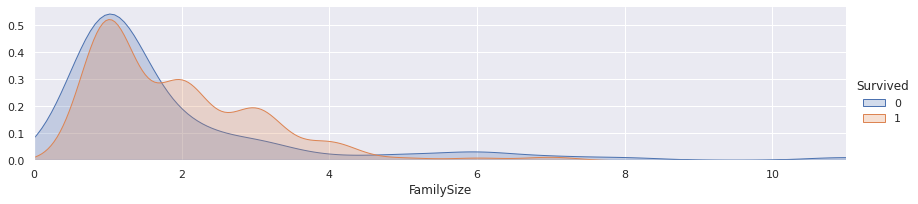

In [64]:
facet = sns.FacetGrid(train, hue='Survived',aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade=True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()

plt.xlim(0)

In [65]:
family_mapping = {1:0, 2:0.4, 3:0.8, 4:1.2, 5:1.6, 6:2, 7:2.4, 8:2.8, 9:3.2, 10:3.6, 11:4}
for data in train_test_data:
    data['FamilySize'] = data['FamilySize'].map(family_mapping)

In [66]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,22.0,1,0,A/5 21171,0.0,2.0,0,0,0.4
1,2,1,1,1,38.0,1,0,PC 17599,2.0,0.8,1,2,0.4
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,0.0
3,4,1,1,1,35.0,1,0,113803,2.0,0.8,0,2,0.4
4,5,0,3,0,35.0,0,0,373450,0.0,2.0,0,0,0.0


In [67]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,892,3,0,34.5,0,0,330911,0.0,2.0,2,0,0.0
1,893,3,1,47.0,1,0,363272,0.0,2.0,0,2,0.4
2,894,2,0,62.0,0,0,240276,0.0,2.0,2,0,0.0
3,895,3,0,27.0,0,0,315154,0.0,2.0,0,0,0.0
4,896,3,1,22.0,1,1,3101298,0.0,2.0,0,2,0.8


In [68]:
features_drop = ['Ticket', 'SibSp', 'Parch']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop('PassengerId', axis=1)

In [69]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']

train_data.shape, target.shape

((891, 8), (891,))

In [70]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,0,3,0,22.0,0.0,2.0,0,0,0.4
1,1,1,1,38.0,2.0,0.8,1,2,0.4
2,1,3,1,26.0,0.0,2.0,0,1,0.0
3,1,1,1,35.0,2.0,0.8,0,2,0.4
4,0,3,0,35.0,0.0,2.0,0,0,0.0


In [71]:
train_data.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,22.0,0.0,2.0,0,0,0.4
1,1,1,38.0,2.0,0.8,1,2,0.4
2,3,1,26.0,0.0,2.0,0,1,0.0
3,1,1,35.0,2.0,0.8,0,2,0.4
4,3,0,35.0,0.0,2.0,0,0,0.0


In [72]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,892,3,0,34.5,0.0,2.0,2,0,0.0
1,893,3,1,47.0,0.0,2.0,0,2,0.4
2,894,2,0,62.0,0.0,2.0,2,0,0.0
3,895,3,0,27.0,0.0,2.0,0,0,0.0
4,896,3,1,22.0,0.0,2.0,0,2,0.8


## Modelling

In [73]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   Fare        891 non-null    float64
 5   Cabin       891 non-null    float64
 6   Embarked    891 non-null    int64  
 7   Title       891 non-null    int64  
 8   FamilySize  891 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 62.8 KB


In [74]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [75]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.75555556 0.82022472 0.7752809  0.66292135 0.79775281 0.78651685
 0.7752809  0.82022472 0.78651685 0.76404494]


In [76]:
round(np.mean(score)*100, 2)

77.44

In [77]:
pred = DecisionTreeClassifier()
scoring = 'accuracy'
score1 = cross_val_score(pred, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score1)

[0.73333333 0.84269663 0.74157303 0.82022472 0.80898876 0.80898876
 0.7752809  0.79775281 0.79775281 0.76404494]


In [78]:
round(np.mean(score1)*100, 2)

78.91

In [79]:
clf = RandomForestClassifier(n_estimators = 13)
scoring = 'accuracy'
score2 = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score2)

[0.81111111 0.85393258 0.7752809  0.80898876 0.83146067 0.84269663
 0.78651685 0.80898876 0.76404494 0.78651685]


In [80]:
round(np.mean(score2)*100, 2)

80.7

### Test

In [81]:
clf = RandomForestClassifier(n_estimators = 13)
clf.fit(train_data, target)

test_data = test.drop('PassengerId', axis=1).copy()
prediction = clf.predict(test_data)

In [82]:
submission = pd.DataFrame({'PassengerId': test['PassengerId'],
                          'Survived': prediction})

submission.to_csv('Submission.csv', index=False)

In [83]:
submission = pd.read_csv('Submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1
